Epoch 0: Errors = 9
Epoch 100: Errors = 4
Epoch 200: Errors = 8
Epoch 300: Errors = 6
Epoch 400: Errors = 6
Epoch 500: Errors = 6
Epoch 600: Errors = 6
Epoch 700: Errors = 6
Epoch 800: Errors = 6
Epoch 900: Errors = 4


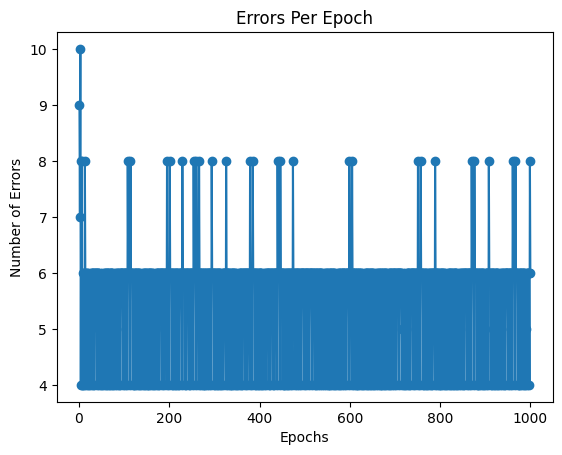

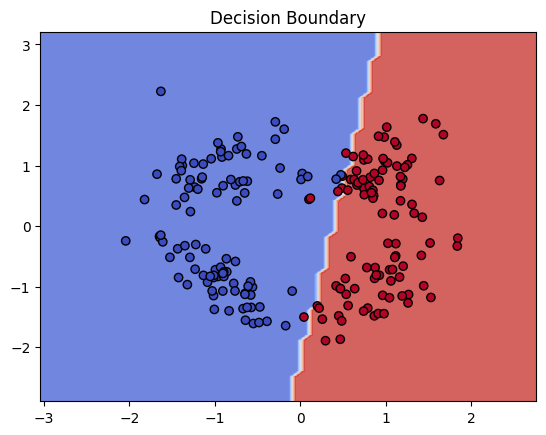

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.errors = []  

    def activation_function(self, x):
        
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  
        self.bias = 0  

        for epoch in range(self.epochs):
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_function(linear_output)

  
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

 
                errors += int(update != 0.0)

            self.errors.append(errors)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Errors = {errors}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)


X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    class_sep=2,  
    random_state=42
)
y = np.where(y == 0, -1, 1)  


scaler = StandardScaler()
X = scaler.fit_transform(X)


model = Perceptron(learning_rate=0.01, epochs=1000)
model.fit(X, y)


plt.plot(range(1, len(model.errors) + 1), model.errors, marker='o')
plt.title('Errors Per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.show()


def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, model)
